### imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [17]:
# Load the dataset
df = pd.read_csv(os.path.join(os.getcwd() , 'datasets' , 'IRIS.csv'))
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [18]:
df.shape

(150, 5)

In [21]:
# check for null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [20]:
# check for duplicates
df.duplicated().sum()

np.int64(3)

In [22]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [23]:
df.shape

(147, 5)

In [25]:
# drop tareget column (clustering task)
X = df.drop(columns=['species'])

In [26]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


<Figure size 1200x800 with 0 Axes>

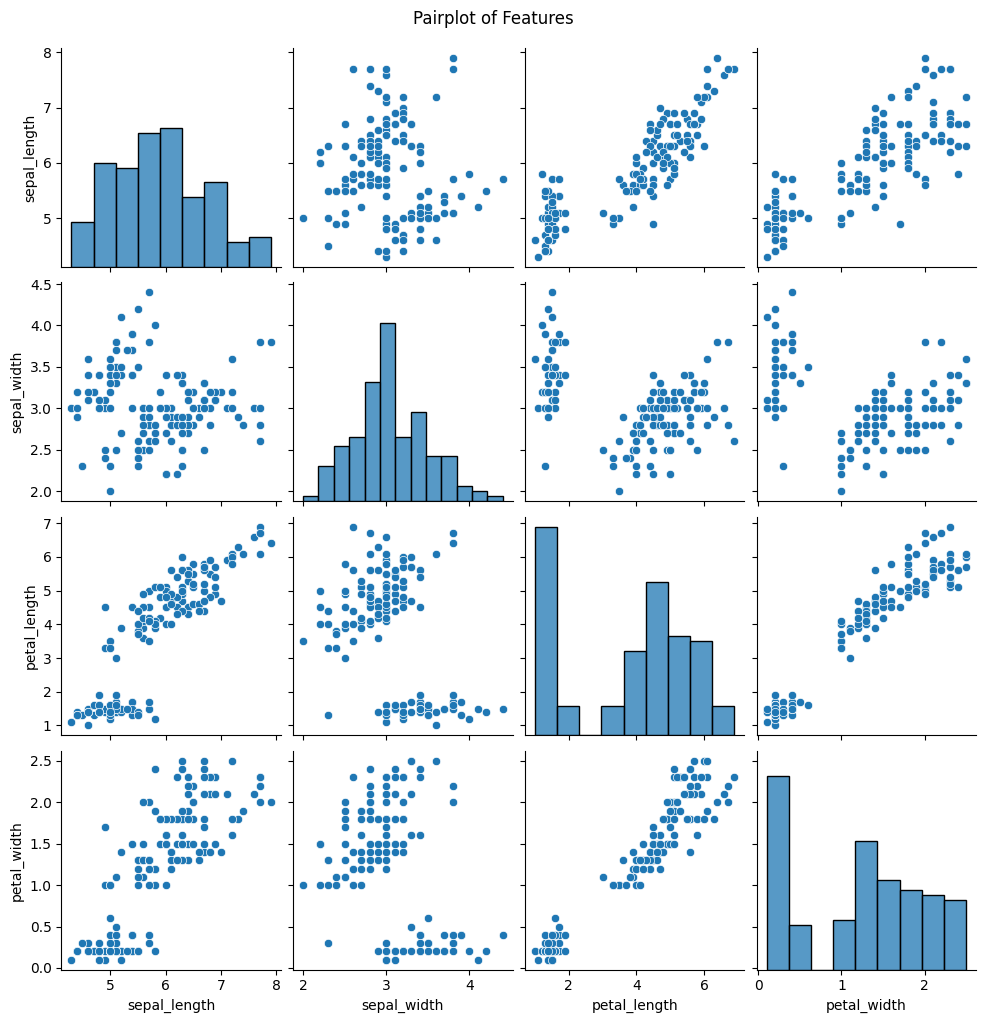

In [40]:
# check the distribution of the features
plt.figure(figsize=(12, 8))
sns.pairplot(X)
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()

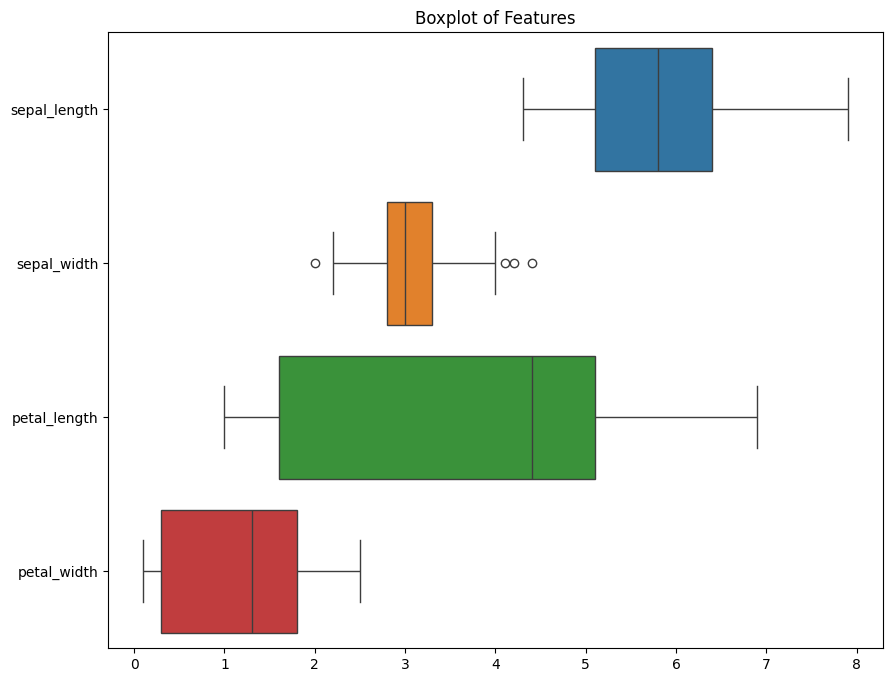

In [ ]:
# check outliers as KMeans is sensitive to outliers
plt.figure(figsize=(10, 8))
sns.boxplot(data=X, orient='h')
plt.title('Boxplot of Features')
plt.show()

In [39]:
# remove outliers using IQR method
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
# before removing outliers
print("Shape before removing outliers:")
print(X.shape)
X_no_outliers = X[~((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)]
# after removing outliers
print("Shape after removing outliers:")
print(X_no_outliers.shape)

Shape before removing outliers:
(147, 4)
Shape after removing outliers:
(143, 4)


In [41]:
X_no_outliers

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
# standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_no_outliers)

In [104]:
# train KMeans model
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, n_init=20, random_state=42)   # n_init is set to 15 for better convergence, reflects the number of times the algorithm will run with different centroid seeds
kmeans.fit(X_scaled)

KMeans(n_clusters=3, n_init=20, random_state=42)

In [105]:
# predict clusters
y_kmeans = kmeans.predict(X_scaled)
# add cluster labels to the original dataframe
X_no_outliers['cluster'] = y_kmeans
X_no_outliers

C:\Users\laphouse\AppData\Local\Temp\ipykernel_12100\253496718.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_no_outliers['cluster'] = y_kmeans


,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


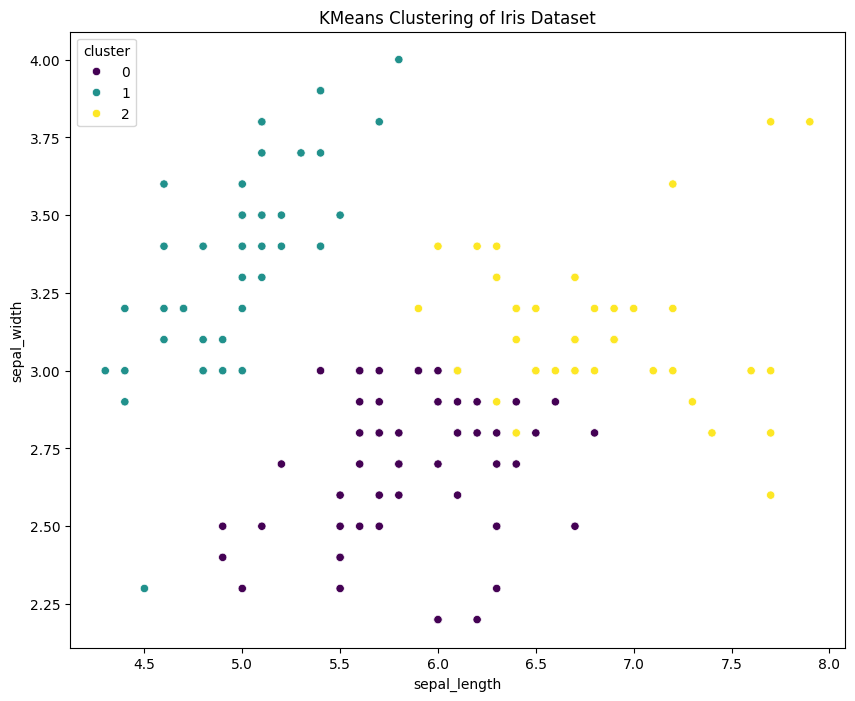

In [106]:
# visualize the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(data=X_no_outliers, x='sepal_length', y='sepal_width', hue='cluster', palette='viridis')
plt.title('KMeans Clustering of Iris Dataset')
plt.show()

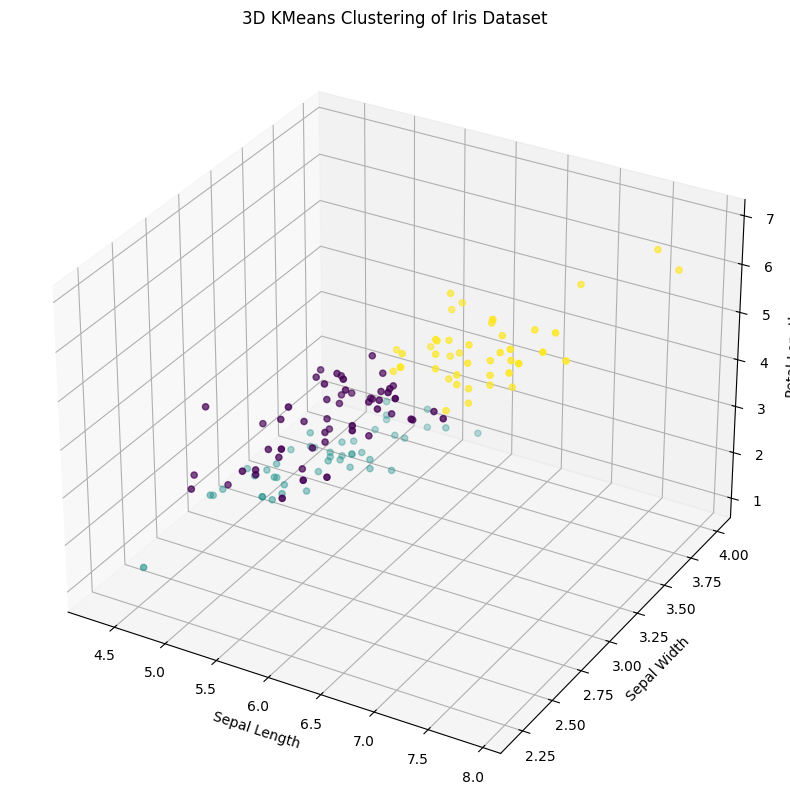

In [107]:
# visualize the clusters in 3D
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_no_outliers['sepal_length'], X_no_outliers['sepal_width'], X_no_outliers['petal_length'], c=X_no_outliers['cluster'], cmap='viridis')
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
plt.title('3D KMeans Clustering of Iris Dataset')
plt.show()

In [ ]:
# evaluate the clustering performance using inertia(distortion) -> required to be minimized
inertia = kmeans.inertia_
print(f'Inertia: {inertia:.2f}')

Inertia: 133.09


In [109]:
# evaluate the clustering performance using silhouette score
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X_scaled, y_kmeans)
print(f'Silhouette Score: {silhouette_avg:.2f}')

Silhouette Score: 0.46


- as it goes closer to one as the certainity of samples assignment to correct cluster increase

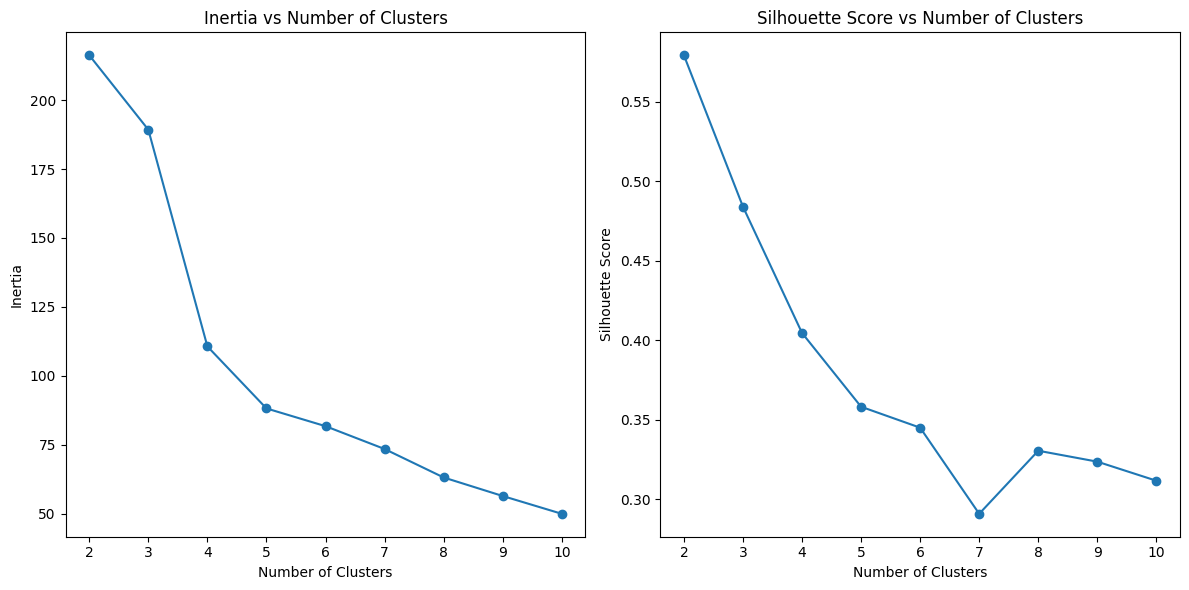

In [111]:
# Try different number of clusters
from sklearn.cluster import KMeans
inertia_list = []
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scaled)
    inertia_list.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))
# Plot inertia and silhouette scores
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia_list, marker='o')
plt.title('Inertia vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.tight_layout()
plt.show()


- ### Inertia says 4 or 5 clusters while silhouette says 2 clusters


In [129]:
# try DBSCAN
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=6)
dbscan.fit(X_scaled)

DBSCAN(min_samples=6)

In [130]:
# predict clusters
y_dbscan = dbscan.labels_
# add cluster labels to the original dataframe
X_no_outliers['dbscan_cluster'] = y_dbscan
X_no_outliers

C:\Users\laphouse\AppData\Local\Temp\ipykernel_12100\966855955.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_no_outliers['dbscan_cluster'] = y_dbscan


,sepal_length,sepal_width,petal_length,petal_width,cluster,dbscan_cluster
0,5.1,3.5,1.4,0.2,1,0
1,4.9,3.0,1.4,0.2,1,0
2,4.7,3.2,1.3,0.2,1,0
3,4.6,3.1,1.5,0.2,1,0
4,5.0,3.6,1.4,0.2,1,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,3
146,6.3,2.5,5.0,1.9,0,-1
147,6.5,3.0,5.2,2.0,2,3
148,6.2,3.4,5.4,2.3,2,-1


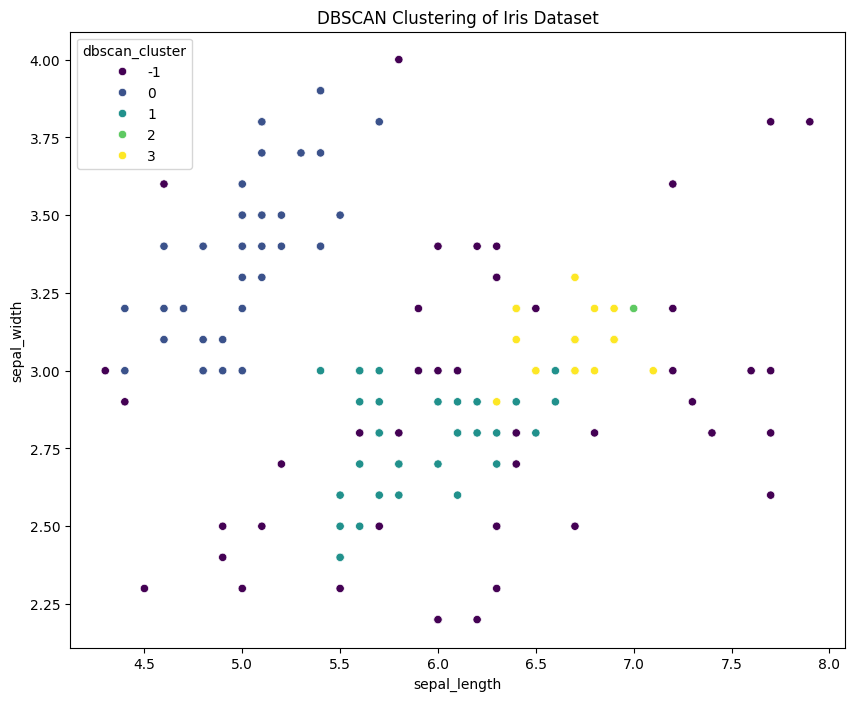

In [131]:
# visualize the DBSCAN clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(data=X_no_outliers, x='sepal_length', y='sepal_width', hue='dbscan_cluster', palette='viridis')
plt.title('DBSCAN Clustering of Iris Dataset')
plt.show()  

In [132]:
# evaluate the clustering performance using silhouette score for DBSCAN
silhouette_avg_dbscan = silhouette_score(X_scaled, y_dbscan)
print(f'Silhouette Score for DBSCAN: {silhouette_avg_dbscan:.2f}')
# evaluate the clustering performance using inertia for DBSCAN
# DBSCAN does not have inertia as it is not based on centroids
# evaluate the clustering performance using number of clusters for DBSCAN
n_clusters_dbscan = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)
print(f'Number of clusters for DBSCAN: {n_clusters_dbscan}')
# evaluate the clustering performance using number of noise points for DBSCAN
n_noise_dbscan = list(y_dbscan).count(-1)
print(f'Number of noise points for DBSCAN: {n_noise_dbscan}')

Silhouette Score for DBSCAN: 0.18
Number of clusters for DBSCAN: 4
Number of noise points for DBSCAN: 46


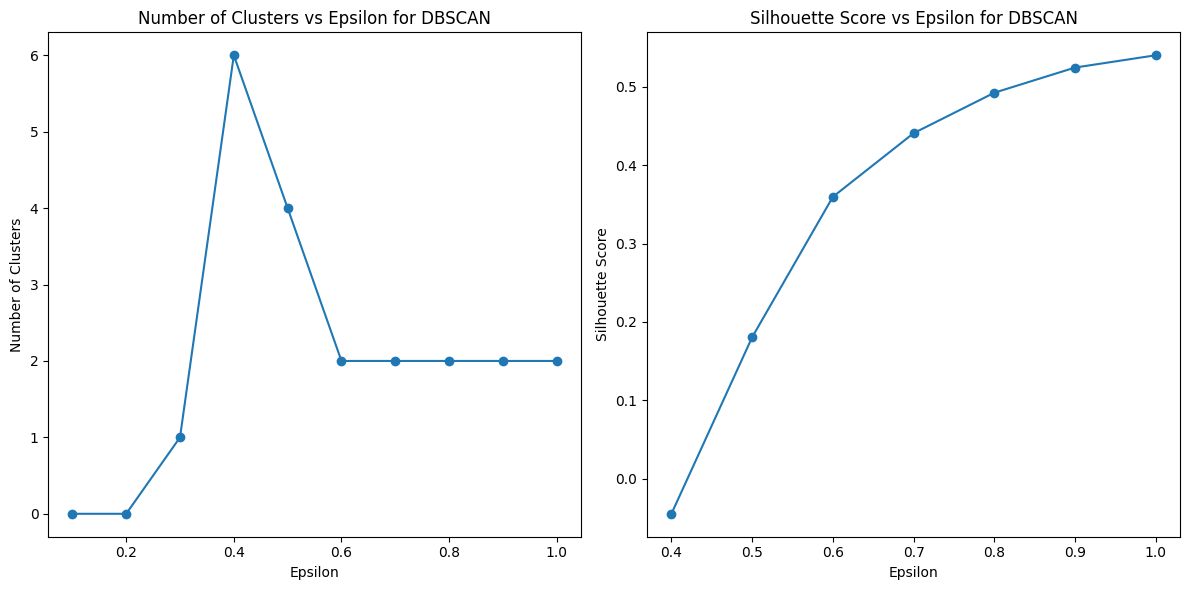

In [128]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

eps_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
inertia_list_dbscan = []
silhouette_scores_dbscan = []

for eps in eps_list:
    dbscan = DBSCAN(eps=eps, min_samples=6)
    dbscan.fit(X_scaled)
    y_dbscan = dbscan.labels_
    
    # Count number of clusters (excluding noise)
    n_clusters = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)
    inertia_list_dbscan.append(n_clusters)
    
    # Silhouette score (only if valid)
    if n_clusters >= 2:
        score = silhouette_score(X_scaled, y_dbscan)
    else:
        score = float('nan')  # Invalid silhouette score
    silhouette_scores_dbscan.append(score)

# Plot inertia and silhouette scores for DBSCAN
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(eps_list, inertia_list_dbscan, marker='o')
plt.title('Number of Clusters vs Epsilon for DBSCAN')
plt.xlabel('Epsilon')
plt.ylabel('Number of Clusters')

plt.subplot(1, 2, 2)
plt.plot(eps_list, silhouette_scores_dbscan, marker='o')
plt.title('Silhouette Score vs Epsilon for DBSCAN')
plt.xlabel('Epsilon')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


C:\Users\laphouse\AppData\Local\Temp\ipykernel_12100\71030027.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_no_outliers['dbscan_cluster'] = y_dbscan


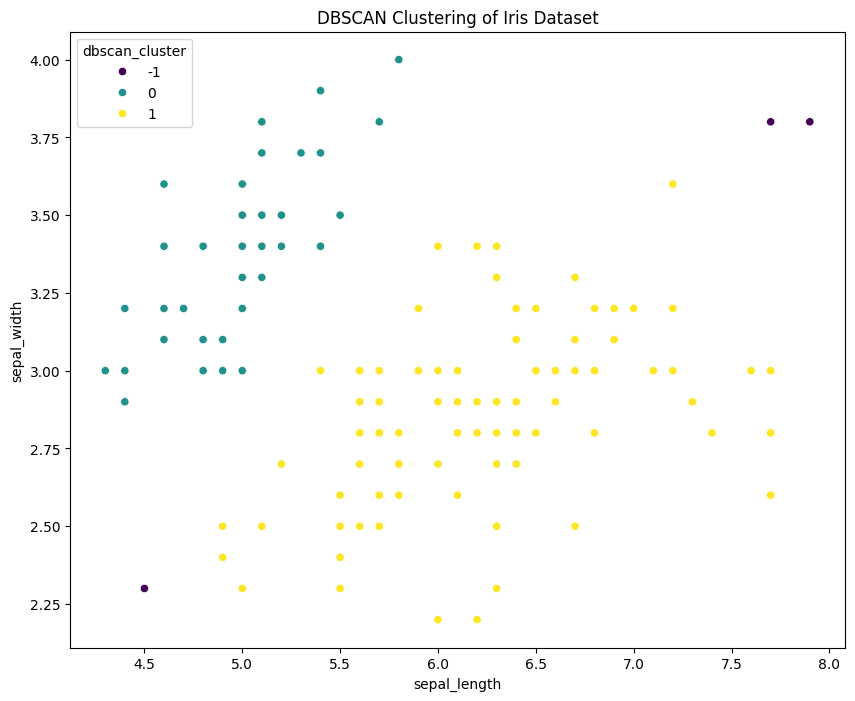

In [135]:
# try 1 eps
dbscan = DBSCAN(eps=1, min_samples=6)
dbscan.fit(X_scaled)
# predict clusters
y_dbscan = dbscan.labels_
# add cluster labels to the original dataframe
X_no_outliers['dbscan_cluster'] = y_dbscan
# visualize the DBSCAN clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(data=X_no_outliers, x='sepal_length', y='sepal_width', hue='dbscan_cluster', palette='viridis')
plt.title('DBSCAN Clustering of Iris Dataset')
plt.show()

In [137]:
# evaluate the clustering performance using silhouette score for DBSCAN
silhouette_avg_dbscan = silhouette_score(X_scaled, y_dbscan)
print(f'Silhouette Score for DBSCAN: {silhouette_avg_dbscan:.2f}')

# evaluate the clustering performance using number of clusters for DBSCAN
n_clusters_dbscan = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)
print(f'Number of clusters for DBSCAN: {n_clusters_dbscan}')
# evaluate the clustering performance using number of noise points for DBSCAN
n_noise_dbscan = list(y_dbscan).count(-1)
print(f'Number of noise points for DBSCAN: {n_noise_dbscan}')


Silhouette Score for DBSCAN: 0.54
Number of clusters for DBSCAN: 2
Number of noise points for DBSCAN: 3


In [139]:
# future tasks
# implement from scratch KMeans and DBSCAN algorithms